# Load the dataset from the Thinkful PostgreSQL database. 

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline



import warnings
warnings.filterwarnings('ignore')



In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


# Investigate the data, and do any necessary data cleaning.


In [3]:
df.head(5)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [34]:
df = df.dropna(subset=["saleprice"])

In [ ]:
# Cleaning Checklist 
# 1. Drop useless columns X
# 2. Combine:
#   - basement bath, above ground bath
# - convert pool area to 'has pool, doesnt have pool'
# 

In [49]:
# Drop columns that I think are useless. 
drop_cols = ['alley', 'id', 'lotfrontage', 'mszoning', 'mssubclass', 'street', 'landcontour', 'lotshape', 'utilities', "lotconfig", 'landslope', 
            'condition2', 'condition1', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior1st', 'masvnrtype',
            'masvnrarea', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 
            'heating', 'heatingqc', 'centralair', 'electrical', 'lowqualfinsf', 'neighborhood', 'bsmthalfbath', 'halfbath', 
             'kitchenqual', 'functional', 'fireplacequ', 'garageyrblt', 'garagetype', 'garagefinish', 'garagearea', 'garagequal',
            'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'fence', 
             'miscfeature', 'miscval', 'mosold', 'yrsold', 'saletype']

In [51]:
df_dropped = df.drop(columns=drop_cols)

In [45]:
df['miscval'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: miscval, dtype: int64

In [52]:
df_dropped.isna().mean()

lotarea          0.000000
bldgtype         0.000000
overallqual      0.000000
overallcond      0.000000
yearbuilt        0.000000
yearremodadd     0.000000
exterior2nd      0.000000
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         0.025342
bsmtcond         0.025342
firstflrsf       0.000000
secondflrsf      0.000000
grlivarea        0.000000
bsmtfullbath     0.000000
fullbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
totrmsabvgrd     0.000000
fireplaces       0.000000
garagecars       0.000000
poolarea         0.000000
poolqc           0.995205
salecondition    0.000000
saleprice        0.000000
dtype: float64

In [53]:
df['foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: foundation, dtype: int64

In [56]:
# Drop some more columns 
drop_cols2 = ['yearbuilt', 'yearremodadd', 'exterior2nd', 'exterqual', 'foundation', 'bsmtcond', 'firstflrsf', 
             'secondflrsf', 'kitchenabvgr', 'bedroomabvgr', 'poolqc']

df_dropped = df_dropped.drop(columns=drop_cols2)

In [58]:
# Basement full bath + abv ground fb = tot full bath
df_dropped['fullbath'] = df_dropped['fullbath'] +df_dropped['bsmtfullbath']
df_dropped = df_dropped.drop(columns='bsmtfullbath')

In [59]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lotarea        1460 non-null   int64 
 1   bldgtype       1460 non-null   object
 2   overallqual    1460 non-null   int64 
 3   overallcond    1460 non-null   int64 
 4   extercond      1460 non-null   object
 5   bsmtqual       1423 non-null   object
 6   grlivarea      1460 non-null   int64 
 7   fullbath       1460 non-null   int64 
 8   totrmsabvgrd   1460 non-null   int64 
 9   fireplaces     1460 non-null   int64 
 10  garagecars     1460 non-null   int64 
 11  poolarea       1460 non-null   int64 
 12  salecondition  1460 non-null   object
 13  saleprice      1460 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 211.1+ KB


In [64]:
# Pool area > 0 = has pool
# Pool area < 0 = has no pool
if [df_dropped['poolarea'] > 0] == True:
    df_dropped['haspool'] = 1
else:
    df_dropped['haspool'] = 0 
    
df_dropped = df_dropped.drop(columns= 'poolarea')

In [65]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lotarea        1460 non-null   int64 
 1   bldgtype       1460 non-null   object
 2   overallqual    1460 non-null   int64 
 3   overallcond    1460 non-null   int64 
 4   extercond      1460 non-null   object
 5   bsmtqual       1423 non-null   object
 6   grlivarea      1460 non-null   int64 
 7   fullbath       1460 non-null   int64 
 8   totrmsabvgrd   1460 non-null   int64 
 9   fireplaces     1460 non-null   int64 
 10  garagecars     1460 non-null   int64 
 11  salecondition  1460 non-null   object
 12  saleprice      1460 non-null   int64 
 13  haspool        1460 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 211.1+ KB


In [66]:
df_dropped.isna().mean()

lotarea          0.000000
bldgtype         0.000000
overallqual      0.000000
overallcond      0.000000
extercond        0.000000
bsmtqual         0.025342
grlivarea        0.000000
fullbath         0.000000
totrmsabvgrd     0.000000
fireplaces       0.000000
garagecars       0.000000
salecondition    0.000000
saleprice        0.000000
haspool          0.000000
dtype: float64

In [71]:
df_dropped[df_dropped['bsmtqual'].isna()]


,lotarea,bldgtype,overallqual,overallcond,extercond,bsmtqual,grlivarea,fullbath,totrmsabvgrd,fireplaces,garagecars,salecondition,saleprice,haspool
17,10791,Duplex,4,5,TA,None,1296,2,6,0,2,Normal,90000,0
39,6040,Duplex,4,5,TA,None,1152,2,6,0,0,AdjLand,82000,0
90,7200,1Fam,4,5,TA,None,1040,1,4,0,2,Normal,109900,0
100,10800,2fmCon,4,7,TA,None,1294,2,7,0,0,Normal,106250,0
103,7018,Duplex,5,5,Fa,None,1535,2,8,0,2,Alloca,118964,0
157,7200,1Fam,5,7,TA,None,1040,1,5,0,2,Normal,109500,0
183,9060,1Fam,5,6,TA,None,1340,1,7,1,1,Normal,120000,0
260,12702,1Fam,5,5,TA,None,882,1,4,0,1,Normal,97000,0
343,8544,Duplex,3,4,TA,None,1040,2,6,0,2,Normal,87500,0
363,7301,1Fam,7,5,TA,None,1922,3,7,1,2,Normal,198500,0


In [73]:
df_dropped = df_dropped.drop(columns= ['overallcond', 'extercond', 'bsmtqual'])

In [74]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lotarea        1460 non-null   int64 
 1   bldgtype       1460 non-null   object
 2   overallqual    1460 non-null   int64 
 3   grlivarea      1460 non-null   int64 
 4   fullbath       1460 non-null   int64 
 5   totrmsabvgrd   1460 non-null   int64 
 6   fireplaces     1460 non-null   int64 
 7   garagecars     1460 non-null   int64 
 8   salecondition  1460 non-null   object
 9   saleprice      1460 non-null   int64 
 10  haspool        1460 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 176.9+ KB


# Explore the data and find some variables that you think would be useful in predicting house prices.


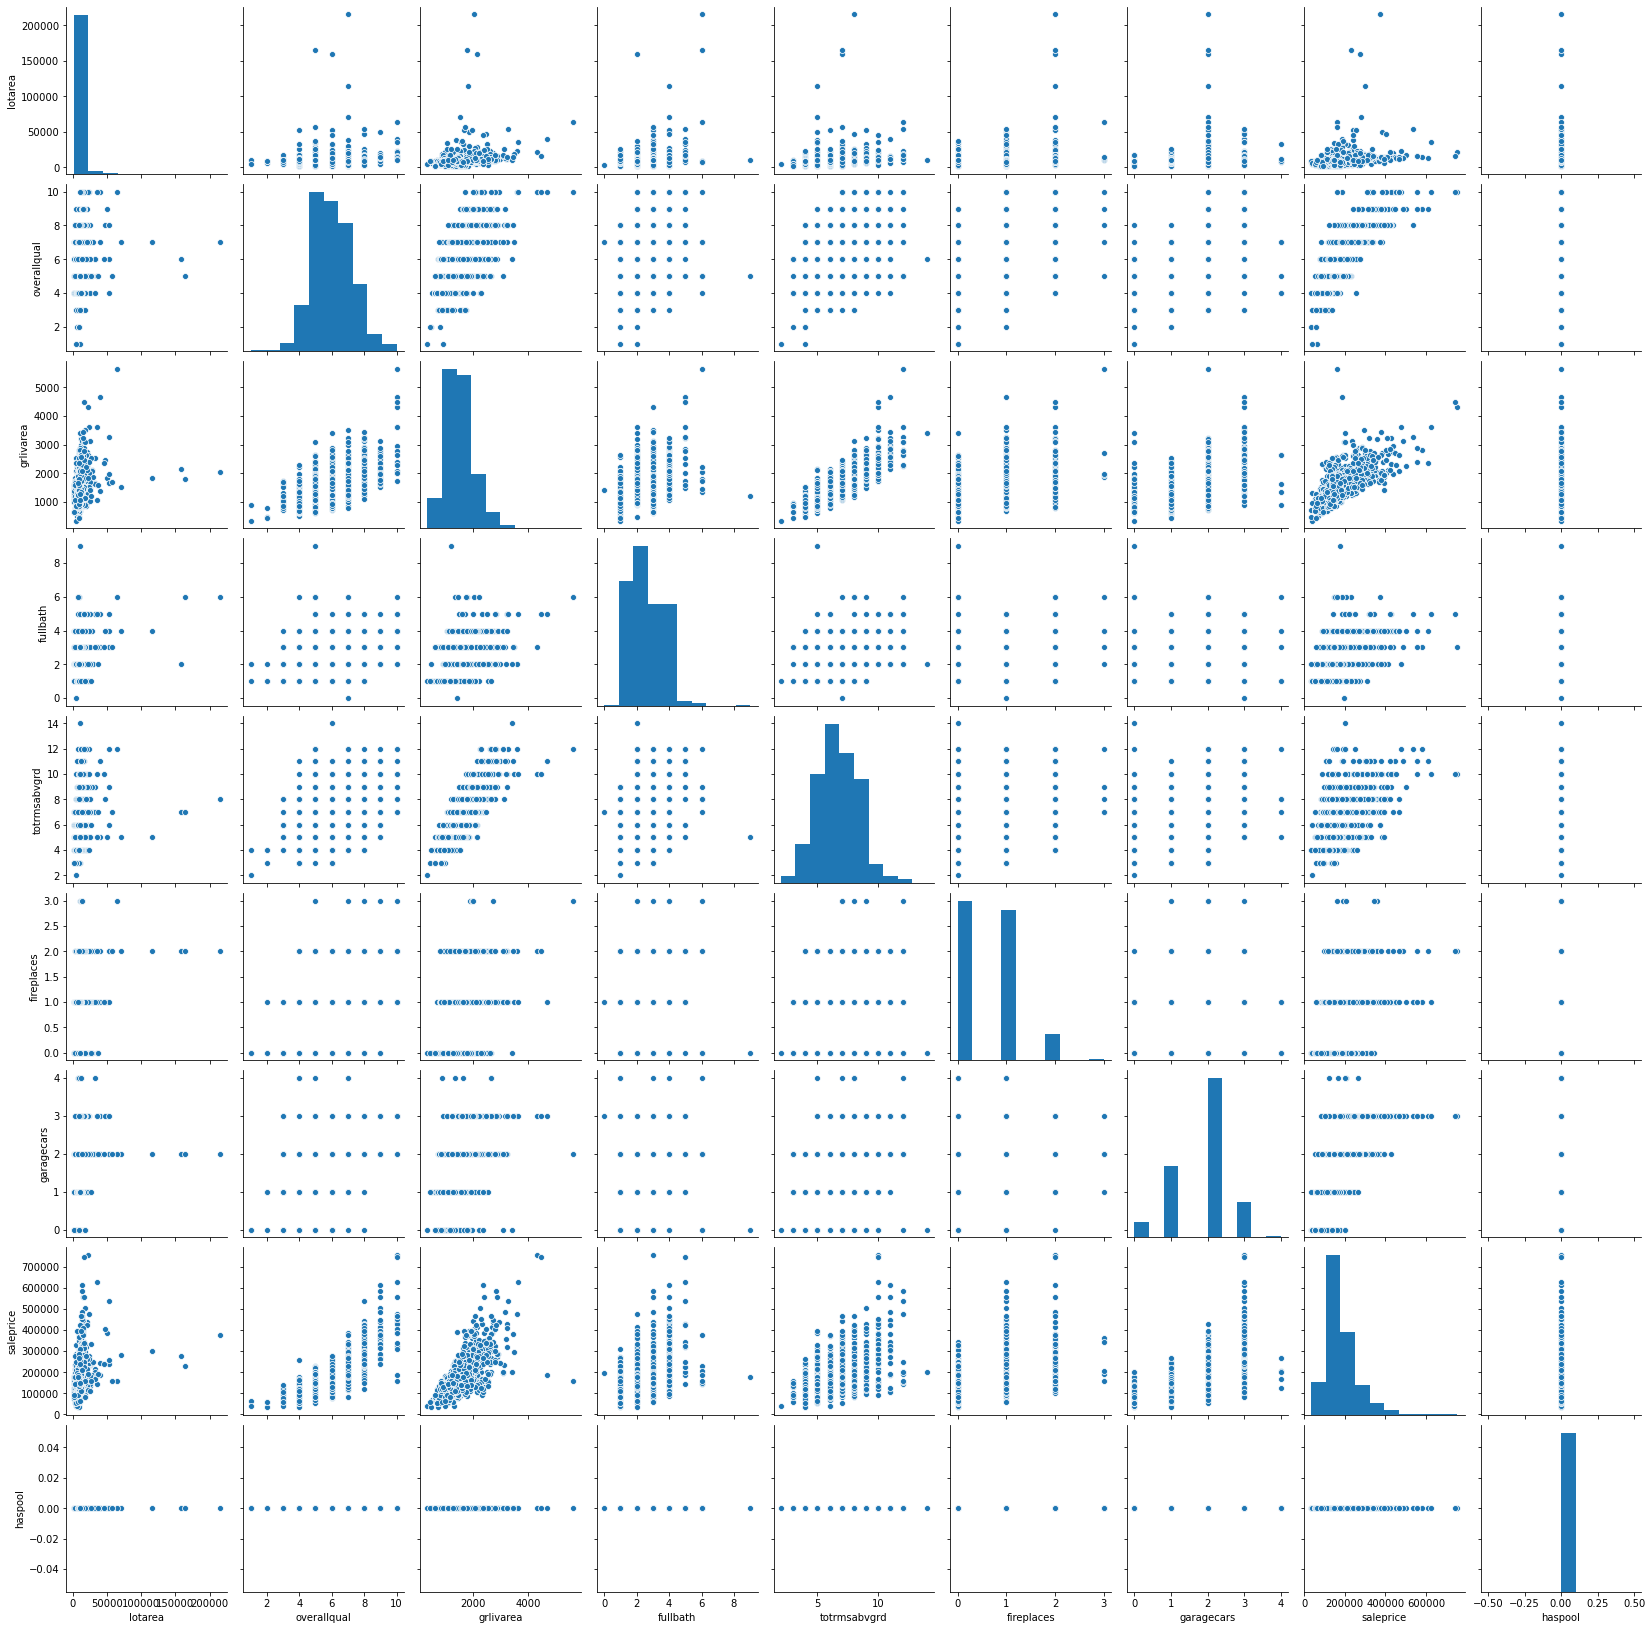

In [76]:
sns.pairplot(df_dropped)
plt.show()

In [80]:
pd.get_dummies(df_dropped["bldgtype"], drop_first=True)
df_dropped = pd.concat([df_dropped, pd.get_dummies(df_dropped["bldgtype"], drop_first=True)], axis=1)
df_dropped.head()

,lotarea,bldgtype,overallqual,grlivarea,fullbath,totrmsabvgrd,fireplaces,garagecars,salecondition,saleprice,haspool,2fmCon,Duplex,Twnhs,TwnhsE
0,8450,1Fam,7,1710,4,8,0,2,Normal,208500,0,0,0,0,0
1,9600,1Fam,6,1262,2,6,1,2,Normal,181500,0,0,0,0,0
2,11250,1Fam,7,1786,4,6,1,2,Normal,223500,0,0,0,0,0
3,9550,1Fam,7,1717,3,7,1,3,Abnorml,140000,0,0,0,0,0
4,14260,1Fam,8,2198,4,9,1,3,Normal,250000,0,0,0,0,0


In [82]:
pd.get_dummies(df_dropped["salecondition"], drop_first=True)
df_dropped = pd.concat([df_dropped, pd.get_dummies(df_dropped["salecondition"], drop_first=True)], axis=1)
#df_dropped.head()

,lotarea,bldgtype,overallqual,grlivarea,fullbath,totrmsabvgrd,fireplaces,garagecars,salecondition,saleprice,haspool,2fmCon,Duplex,Twnhs,TwnhsE,AdjLand,Alloca,Family,Normal,Partial
0,8450,1Fam,7,1710,4,8,0,2,Normal,208500,0,0,0,0,0,0,0,0,1,0
1,9600,1Fam,6,1262,2,6,1,2,Normal,181500,0,0,0,0,0,0,0,0,1,0
2,11250,1Fam,7,1786,4,6,1,2,Normal,223500,0,0,0,0,0,0,0,0,1,0
3,9550,1Fam,7,1717,3,7,1,3,Abnorml,140000,0,0,0,0,0,0,0,0,0,0
4,14260,1Fam,8,2198,4,9,1,3,Normal,250000,0,0,0,0,0,0,0,0,1,0


In [84]:
df_dropped = df_dropped.drop(columns=['salecondition', 'bldgtype'])

In [85]:
df_dropped.head()


,lotarea,overallqual,grlivarea,fullbath,totrmsabvgrd,fireplaces,garagecars,saleprice,haspool,2fmCon,Duplex,Twnhs,TwnhsE,AdjLand,Alloca,Family,Normal,Partial
0,8450,7,1710,4,8,0,2,208500,0,0,0,0,0,0,0,0,1,0
1,9600,6,1262,2,6,1,2,181500,0,0,0,0,0,0,0,0,1,0
2,11250,7,1786,4,6,1,2,223500,0,0,0,0,0,0,0,0,1,0
3,9550,7,1717,3,7,1,3,140000,0,0,0,0,0,0,0,0,0,0
4,14260,8,2198,4,9,1,3,250000,0,0,0,0,0,0,0,0,1,0


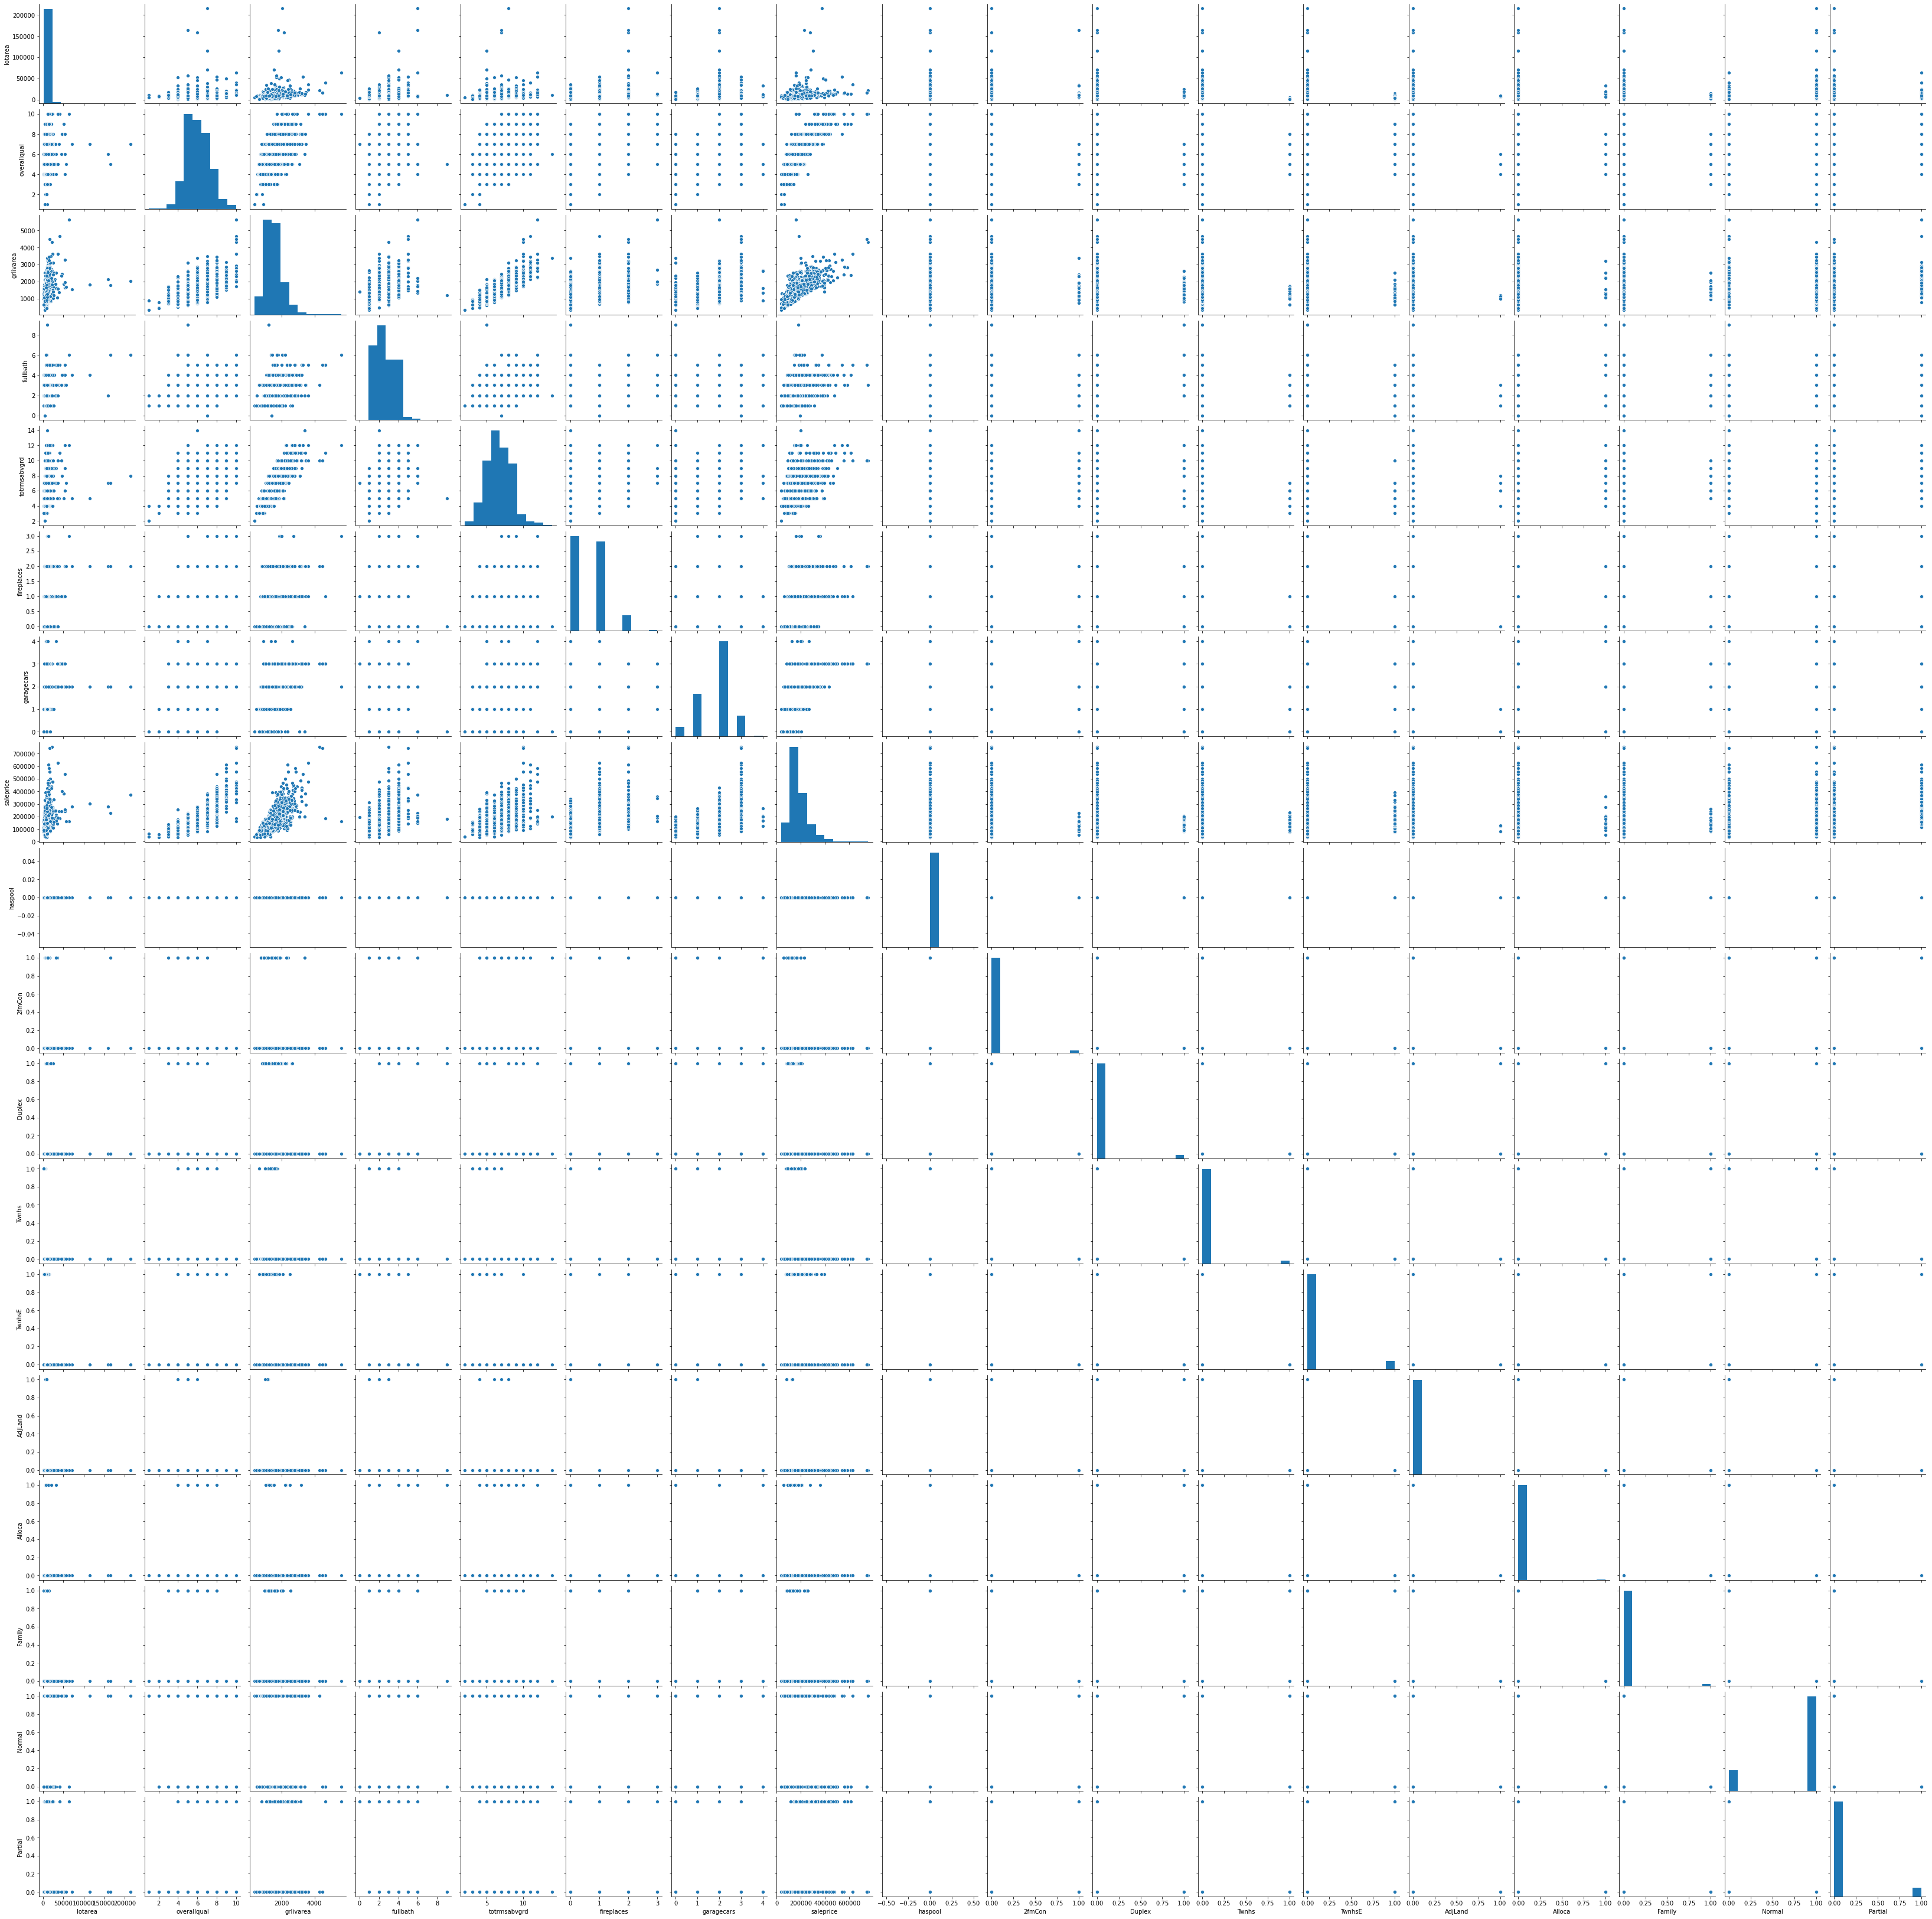

In [86]:
sns.pairplot(df_dropped)
plt.show()

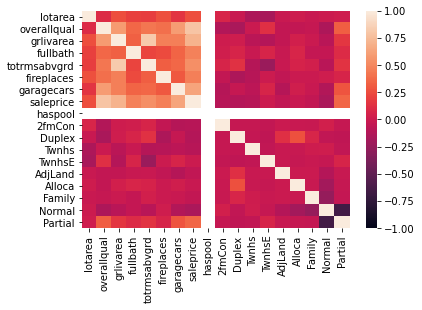

In [88]:
sns.heatmap(df_dropped.corr(), vmin=-1)
plt.show()

In [90]:
keep_cols = ['lotarea', 'overallqual', 'grlivarea', 'fullbath', 'fireplaces', "garagecars", "saleprice"]

In [91]:
features = df_dropped[keep_cols]

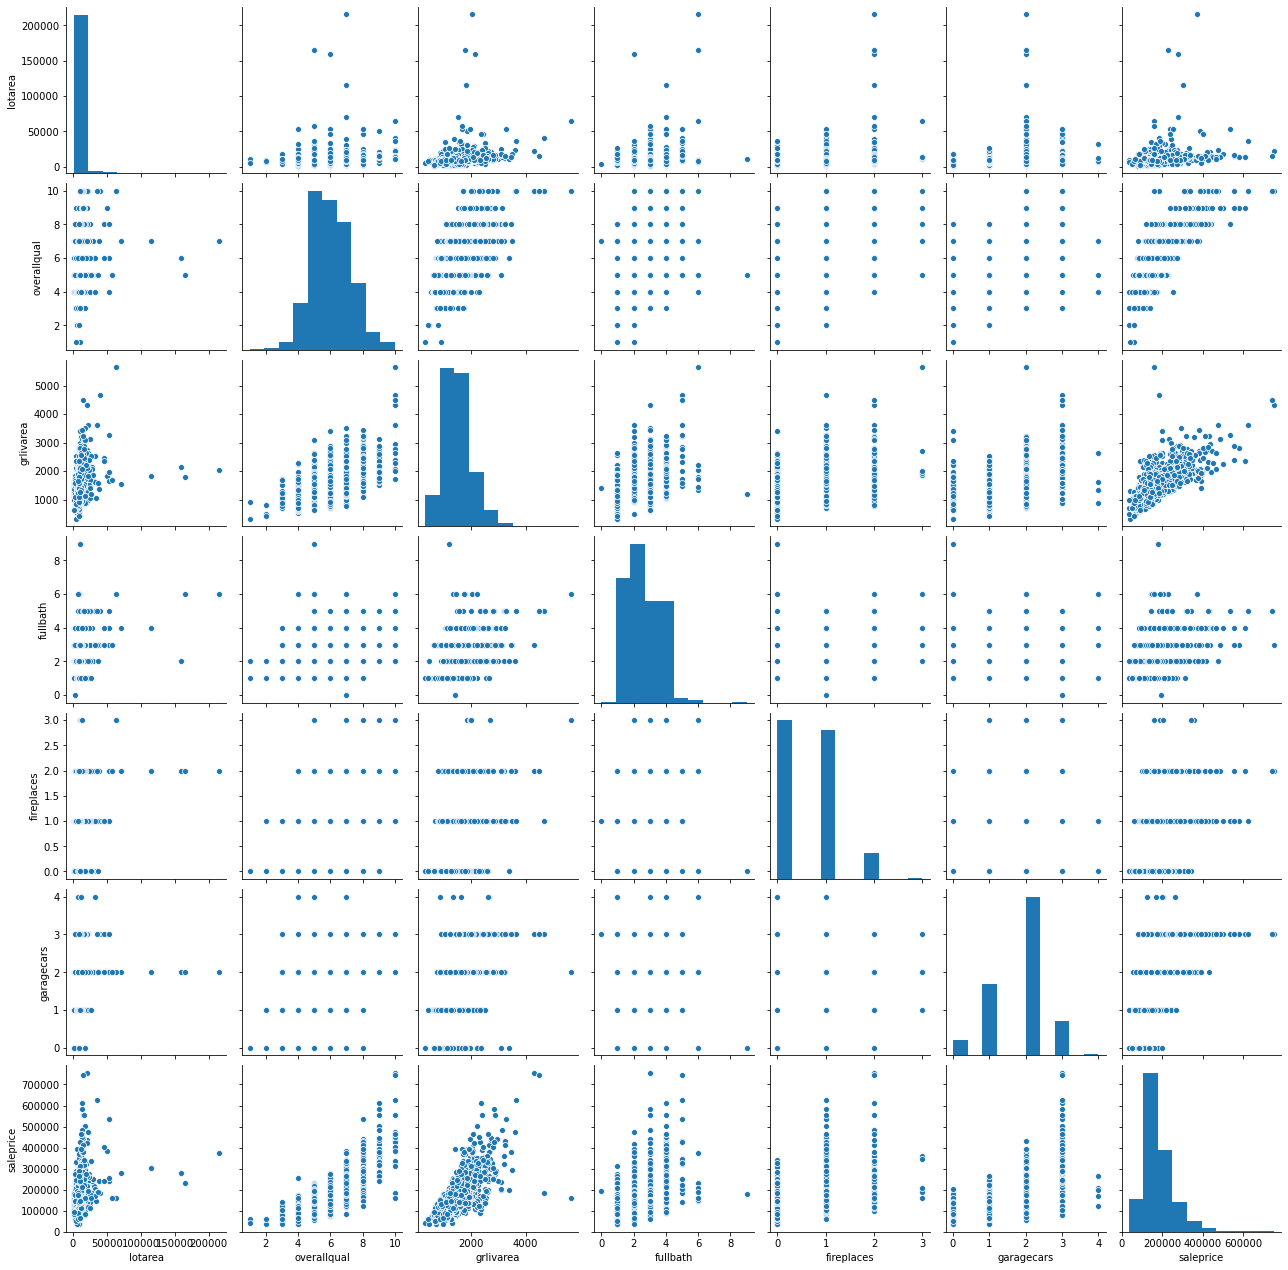

In [92]:
sns.pairplot(features)
plt.show()

In [93]:
feature_cols = ['overallqual', 'grlivarea', 'fullbath', 'saleprice']
model_df = features[feature_cols]

# Build your initial model using these features and estimate the parameters using OLS.

In [96]:
X = model_df.drop(columns='saleprice')
y = model_df['saleprice']

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size= 0.2, random_state=2)

In [97]:
model = LogisticRegression(solver='lbfgs', random_state=2,max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2)

In [98]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_train, y_train)



In [99]:
train_score

0.026541095890410957

In [100]:
test_score

0.026541095890410957

In [101]:
print(model.intercept_)
print(model.coef_)

[ 2.60686159e-01  3.08739177e-01  3.60951520e-02  1.88002780e-01
  1.92365896e-01  1.64096804e-01  9.24070204e-02  4.71884858e-01
  1.53699361e-01  1.39442205e-01  1.17023471e-01  7.07310165e-02
  2.62882118e-01  7.99514384e-02  2.42543039e-01  1.90416681e-01
  1.66941346e-01  1.55499231e-01  4.77730220e-02  5.59160157e-02
  3.21259351e-01  1.20523599e-01  2.42535969e-01  4.55815235e-01
  1.33544989e-01  2.06326022e-01  4.41506355e-01  3.56537621e-01
  2.57704761e-01  8.86103219e-02  1.51025282e-01  3.60694343e-01
  1.28921547e-01  4.49179420e-01  1.44715065e-01  5.98525057e-01
  2.25089977e-01  1.06776021e-01  4.92525424e-01  7.92344467e-02
  9.95748425e-02 -7.41246609e-03  1.86817333e-01  4.12948566e-01
  1.33527163e-01  4.05886555e-02  2.01606509e-01  2.94543279e-01
  1.06776021e-01  9.85043427e-02  9.95748425e-02  1.16249611e-01
  7.56559843e-02  2.59651279e-01  3.79807021e-01 -1.59712114e-02
  2.38154821e-01  9.13958224e-02  4.56546873e-02  1.16089301e-01
  1.39442205e-01  1.06582